# Day 24 - LU2
<h2>Demo - Bayes' Theorem</h2>

### Analyzing Floods and Rainfall in Kerala

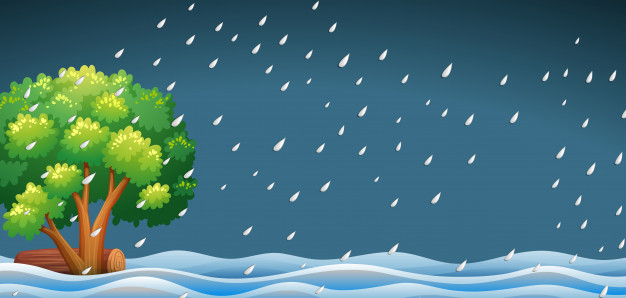

Kerala is one of the worst flood-hit states in India. In August 2020, the state was hit by floods that resulted due to heavy rainfall and caused damage of hundreds of crore rupees. Every year, the state experiences casualty and damages upto some extent due to heavy rainfall.

Data of monthly rainfall in Kerala from 1901 to 2018 is provided. It also contains information of floods. Use this information to calculate upto what extent the heavy rainfall is responsible for floods in Kerala.

### Attributes in the Dataset:

__YEAR__: Year between 1901 to 2018

__JAN, FEB,..., DEC__:Rainfall in mm in the specified month

__ANNUAL RAINFALL__: Total rainfall in mm in that year

__FLOODS__: YES or NO, in that year

### Load and understand the data set

In [20]:
import pandas as pd
data = pd.read_csv('kerala_floods.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [21]:
data.shape

(118, 16)

In [22]:
#check for existence of rows with null values
data.isnull().any()

SUBDIVISION         False
YEAR                False
JAN                 False
FEB                 False
MAR                 False
APR                 False
MAY                 False
JUN                 False
JUL                 False
AUG                 False
SEP                 False
OCT                 False
NOV                 False
DEC                 False
 ANNUAL RAINFALL    False
FLOODS              False
dtype: bool

There are no rows having null values.

#### Q. What is the probability of rainfall more than 500mm in the month of June, provided that it flooded in that year in Kerala? Calculate using Bayes' Theorem.

#### Bayes' Theorem:

Bayes' theorem is an extension of Conditional Probability. It allows to calculate dependnet probabilities using past incidents.
In our case, data of flooding and rainfall in June is available. That gives us information about probability of flooding and flooding when rainfall was more than 500mm. Use this information to calculate chances that the flood was caused due to heavy rainfall in June that year.

Formula:

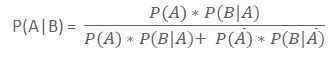

In [23]:
#converting rainfall values into binary values - 0: below 500mm, 1: above 500mm
data["JUN_MoreThan_500"] = (data["JUN"] > 500).astype("int")

#coverting values in FLOODS column to numeric
data["FLOODS"] = data["FLOODS"].map({"YES": 1, "NO": 0})
data["FLOODS"].head()

#create a new dataframe with only the required columns
data2 = data.loc[:, ["YEAR", "JUN_MoreThan_500","FLOODS"]]

data2.head()

,YEAR,JUN_MoreThan_500,FLOODS
0,1901,1,1
1,1902,0,1
2,1903,1,1
3,1904,1,1
4,1905,1,0


In [24]:
#display counts using a cross-tab
pd.crosstab(data2["FLOODS"], data2["JUN_MoreThan_500"], margins=True, margins_name="Total")

JUN_MoreThan_500,0,1,Total
FLOODS,,,
0,19,39,58
1,6,54,60
Total,25,93,118


### Calculate various probabilitites

In [25]:
#probability of having rainfall more than 500mm in June
p_J500 = round(93/118,3)
p_J500

0.788

In [26]:
#probability of flooding
p_Floods = round(60/118,3)
p_Floods

0.508

In [27]:
#probability of flooding and having rainfall more than 500mm in June
p_floodsANDj500 = round(54/118,3)
p_floodsANDj500

0.458

In [28]:
#probability of flooding given that it rained more than 500mm in June
p_floods_given_j500 = round(p_floodsANDj500/p_J500,3)
p_floods_given_j500

0.581

#### Calculate Probabilities of Complement Events

In [29]:
#probability of rainfall less than 500mm in June
p_j500_not = round(25/118,3)
p_j500_not

0.212

In [30]:
#probability of flooding given that it rained less than 500mm in June
p_floods_given_j500not = round(6/25,3)
p_floods_given_j500not

0.24

In [31]:
#probability of rainfall more than 500mm in June given that it flooded
#substituting all probabilitites in the above formula of Bayes' Theorem
p_j500_given_floods = (p_J500 * p_floods_given_j500)/((p_J500 * p_floods_given_j500)+ (p_j500_not * p_floods_given_j500not))
p_j500_given_floods

0.8999819149689016

### Inference:

There is a 90% chance of having rainfall more than 500mm in the month June when it's known that it flooded that year in Kerala. We can conclude that heavy rainfall is a major cause of flooding in Kerala.